<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


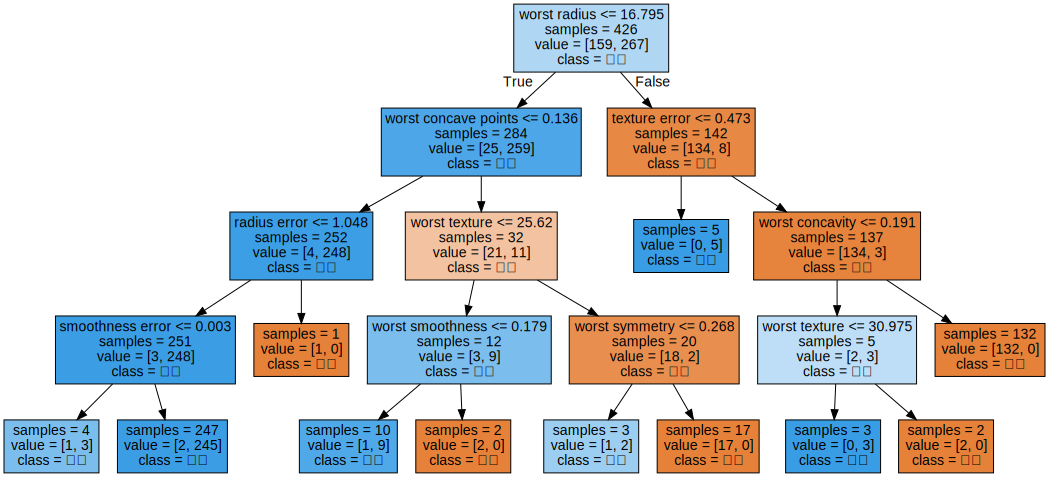

특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


'\n첫 번째 노드에서 사용한 특성(“worst radius”)이 가장 중요한 특성으로 나타납니다. 이 그래프는 첫 번째 노드에서 두 클래스를 꽤 잘 나누고 있다는 우리의 관찰을 뒷받침해줍니다.\n그러나 어떤 특성의 feature_importance_ 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아닙니다. 단지 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있습니다.\n\n선형 모델의 계수와는 달리, 특성 중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지는 알 수 없습니다. \n즉 특성 중요도의 값은 “worst radius”가 중요하다고 알려주지만 높은 반지름이 양성을 의미하는지 악성을 의미하는지는 알 수 없습니다. \n사실 특성과 클래스 사이에는 간단하지 않은 관계가 있을 수 있으며 다음 예에서 이런 점을 살펴보겠습니다\n\n'

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  

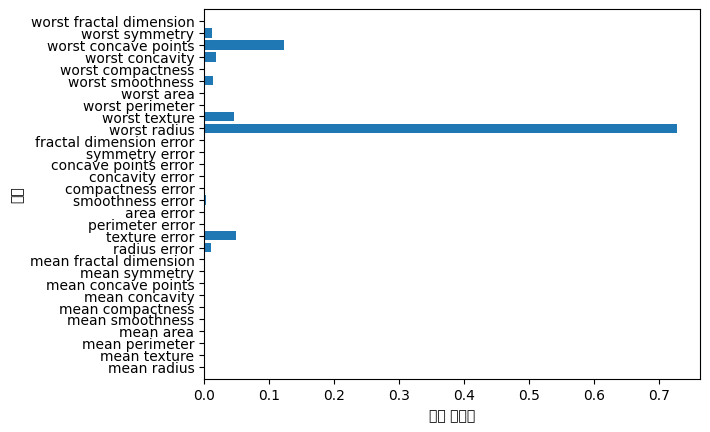

In [34]:
#https://jhryu1208.github.io/posts/ML_decision_tree/
"""사이킷런에서 제공하는 유방암 데이터를 활용하여 결정트리 분류 실습을 해보겠습니다.
전반적인 방식은 지금까지 했던 다른 머신러닝 모델과 유사합니다.
Classifier를 만들고, fitting한 뒤, Test해보는 식입니다.
Classifier만 DecisionTreeClassfier를 사용한다는 것을 제외하고는 다른게 거의 없습니다.
"""
import numpy as np
import sys
#import mglearn
import graphviz
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

#======================================================
"""
결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해질 수 있습니다.
그래서 가지치기하지 않은 트리는 과대적합되기 쉽고 새로운 데이터에 잘 일반화되지 않습니다.
이제 사전 가지치기를 트리에 적용해서 훈련 데이터에 완전히 학습되기 전에 트리의 성장을 막아보겠습니다.
한 가지 방법은 일정 깊이에 도달하면 트리의 성장을 멈추게 하는 것입니다.
max_depth=4 옵션을 주면 연속된 질문을 최대 4개로 제한합니다
"""

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

#======================================================
"""
트리 모듈의 export_graphviz 함수를 이용해 트리를 시각화할 수 있습니다.
이 함수는 그래프 저장용 텍스트 파일 포맷인 .dot 파일을 만듭니다.
각 노드에서 다수인 클래스를 색으로 나타내기 위해 옵션 3 을 주고 적절히 레이블되도록 클래스 이름과 특성 이름을 매개변수로 전달합니다.
"""

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names,
                impurity=False, filled=True)

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

"""
전체 트리를 살펴보는 것은 어려울 수 있으니, 대신 트리가 어떻게 작동하는지 요약하는 속성들을 사용할 수 있습니다.
가장 널리 사용되는 속성은 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도feature importance입니다.
이 값은 0과 1 사이의 숫자로, 각 특성에 대해 0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 타깃 클래스를 예측했다는 뜻입니다.
특성 중요도의 전체 합은 1입니다.
"""
print("특성 중요도:\n{}".format(tree.feature_importances_))

"""
선형 모델의 계수를 시각화하는 것과 비슷한 방법으로 특성 중요도도 시각화할 수 있습니다
"""
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

"""
첫 번째 노드에서 사용한 특성(“worst radius”)이 가장 중요한 특성으로 나타납니다. 이 그래프는 첫 번째 노드에서 두 클래스를 꽤 잘 나누고 있다는 우리의 관찰을 뒷받침해줍니다.
그러나 어떤 특성의 feature_importance_ 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아닙니다. 단지 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있습니다.

선형 모델의 계수와는 달리, 특성 중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지는 알 수 없습니다.
즉 특성 중요도의 값은 “worst radius”가 중요하다고 알려주지만 높은 반지름이 양성을 의미하는지 악성을 의미하는지는 알 수 없습니다.
사실 특성과 클래스 사이에는 간단하지 않은 관계가 있을 수 있으며 다음 예에서 이런 점을 살펴보겠습니다

"""
